# HOMEWORK 4 - ARNO AMABILE
___

# Assignment 3 - Goodness of fit on Citibike Data

test if the distribution of ages can be modelled by a Gaussian

1) all riders

2) summer riders vs winder riders

use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!

CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
distributions into the test, not just 'norm' and the few others available by keyword
my usual imports and setups

I need 2 seasons, lets start reading in data from January 2015, and June 2015. One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be.

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_01=pd.read_csv(os.getenv ('PUI2015')+'/Data/201501-citibike-tripdata.csv')
df_02=pd.read_csv(os.getenv ('PUI2015')+'/Data/201502-citibike-tripdata.csv')
df_12=pd.read_csv(os.getenv ('PUI2015')+'/Data/201412-citibike-tripdata.csv')

df_12['age'] = 2015-df_12['birth year'][(df_12['usertype'] == 'Subscriber')]
df_01['age'] = 2015-df_01['birth year'][(df_01['usertype'] == 'Subscriber')]
df_02['age'] = 2015-df_02['birth year'][(df_02['usertype'] == 'Subscriber')]

df_W = df_12.append(df_01.append(df_02))

In [3]:
df_06=pd.read_csv(os.getenv ('PUI2015')+'/Data/201506-citibike-tripdata.csv')
df_07=pd.read_csv(os.getenv ('PUI2015')+'/Data/201506-citibike-tripdata.csv')
df_08=pd.read_csv(os.getenv ('PUI2015')+'/Data/201506-citibike-tripdata.csv')

df_06['age'] = 2015-df_06['birth year'][(df_06['usertype'] == 'Subscriber')]
df_07['age'] = 2015-df_07['birth year'][(df_07['usertype'] == 'Subscriber')]
df_08['age'] = 2015-df_08['birth year'][(df_08['usertype'] == 'Subscriber')]

df_S = df_06.append(df_07.append(df_08))

In [4]:
df_all = df_W.append(df_S)

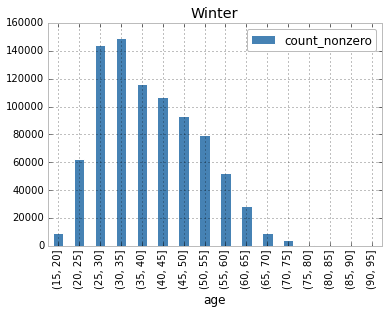

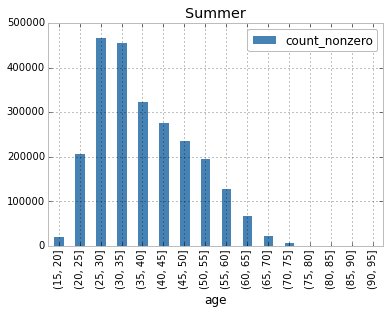

In [5]:
# Nobody is younger than 15 years old, so to avoid NaN cells, I start the categories at 15
bins = np.arange(15, 100, 5)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")

In [6]:
# Create a distribution from the dataframes
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])
A_age_dist = df_all.age.groupby(pd.cut(df_all.age, bins)).agg([count_nonzero])

### 1 - KS tests for goodness of fit

In [13]:
# Compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
ksA=scipy.stats.kstest(A_age_dist, 'norm')
print "KS statistic for winter riders, normal fit:", ksW[0]
print "KS statistic for summer riders, normal fit:", ksS[0]
print "KS statistic for all riders, normal fit:", ksA[0], "\n"

# Compare to Gamma 

ksW=scipy.stats.kstest(W_age_dist, 'expon', args=(40,))
ksS=scipy.stats.kstest(S_age_dist, 'expon', args=(35,))
ksA=scipy.stats.kstest(A_age_dist, 'expon', args=(39,))

print "KS statistic for winter riders, exponential fit:", ksW[0]
print "KS statistic for winter riders, exponential fit:", ksS[0]
print "KS statistic for winter riders, exponential fit:", ksA[0]

KS statistic for winter riders, normal fit: 1.0
KS statistic for summer riders, normal fit: 1.0
KS statistic for all riders, normal fit: 1.0 

KS statistic for winter riders, exponential fit: 1.0
KS statistic for winter riders, exponential fit: 1.0
KS statistic for winter riders, exponential fit: 1.0


All those KS statistics are very high, as the critical value for a significance level of $\alpha=0.05$ is $c(\alpha) = 1.36\times \sqrt \frac{n_1 + n_2}{n_1*n_2}$. We can thus reject the null hypothesis that any of those age distributions (for winter, summer, or all riders) is drawn from a normal or a gamma distribution at a 5 % significance level.

### 2 - AD Test

In [18]:
# Compare to normal

adW=scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], 'norm')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], 'norm')

print "AD statistic for winter riders, normal fit: {0:.3f}".format(adW[0])
print "AD statistic for summer riders, normal fit: {0:.3f}".format(adS[0])
print "AD statistic for all riders, normal fit: {0:.3f}".format(adA[0]), "\n"

# Compare to Gamma 

adW=scipy.stats.anderson(W_age_dist['count_nonzero'], 'expon')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], 'expon')
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], 'expon')

print "AD statistic for winter riders, exponential fit: {0:.3f}".format(adW[0])
print "AD statistic for summer riders, exponential fit: {0:.3f}".format(adS[0])
print "AD statistic for all riders, exponential fit: {0:.3f}".format(adA[0])

AD statistic for winter riders, normal fit: 0.821
AD statistic for summer riders, normal fit: 0.869
AD statistic for all riders, normal fit: 0.853 

AD statistic for winter riders, exponential fit: 3.984
AD statistic for summer riders, exponential fit: 4.897
AD statistic for all riders, exponential fit: 4.582


The critical value at the 5 % significance level is 0.759. All those statistics are above the value, so we can reject the null hypothesis at this significance level for all the age distributions: they are drawn neither from a gaussian nor from an exponential distribution.

However, if we are more ambitious and take a significance level of 1 %, the critical value is 1.053, and we thus fail to reject the null hypothesis that the distributions are drawn from a gaussian distribution. The fact that the AD test fail to reject it, and that the KS test does not (even with a 1 % significance level), is due to the fact that the critical value decreases with the sample size (very large here) in the KS test and not in the AD test.